In [ ]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15, 10)
import seaborn as sns
#sns.set(rc={'axes.facecolor':'cornflowerblue', 'figure.facecolor':'cornflowerblue'})
from sklearn.linear_model import LinearRegression

###### Part 0: Reading the data

In [ ]:
#reading csv file
df = pd.read_csv("Fytlyff_DS_Interview.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 10 columns):
 #   Column                                                                                                                     Non-Null Count  Dtype  
---  ------                                                                                                                     --------------  -----  
 0   Year                                                                                                                       2160 non-null   int64  
 1   Month                                                                                                                      2160 non-null   object 
 2   MobileWeb_or_Web                                                                                                           2160 non-null   object 
 3   Type_of_Customers?                                                                                                         2160 

In [ ]:
df.head()

,Year,Month,MobileWeb_or_Web,Type_of_Customers?,Where_Are_They_comming_from?,Which_Place_in_India?,How_many_Landed_on_our_Page?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?
0,2019,Jan,Desktop_Website,Existing_Customer,Came_From_Google,Bangalore,NaN,NaN,56892,17178
1,2019,Jan,Desktop_Website,Existing_Customer,Came_From_Google,Chennai,NaN,NaN,41460,11916
2,2019,Jan,Desktop_Website,Existing_Customer,Came_From_Google,Dehradun,NaN,NaN,55561,19461
3,2019,Jan,Desktop_Website,Existing_Customer,Came_From_Google,Indore,NaN,NaN,320923,110667
4,2019,Jan,Desktop_Website,Existing_Customer,Came_From_Google,Pune,NaN,NaN,220937,46033


###### Part 1: Data Cleaning

In [ ]:
def clean(dataframe):
  dataframe = dataframe.fillna(0)#fill null values with zero
  dataframe = dataframe.replace(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],[1,2,3,4,5,6,7,8,9,10,11,12])#change months to numeric values, still categorical
  dataframe = dataframe.replace(['Came_From_Google','Landed_on_the_page_Directly'],['Google', 'Direct_traffic'])
  return dataframe

clean_df = clean(df)

In [ ]:
clean_df

,Year,Month,MobileWeb_or_Web,Type_of_Customers?,Where_Are_They_comming_from?,Which_Place_in_India?,How_many_Landed_on_our_Page?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?
0,2019,1,Desktop_Website,Existing_Customer,Google,Bangalore,0.0,0.0,56892,17178
1,2019,1,Desktop_Website,Existing_Customer,Google,Chennai,0.0,0.0,41460,11916
2,2019,1,Desktop_Website,Existing_Customer,Google,Dehradun,0.0,0.0,55561,19461
3,2019,1,Desktop_Website,Existing_Customer,Google,Indore,0.0,0.0,320923,110667
4,2019,1,Desktop_Website,Existing_Customer,Google,Pune,0.0,0.0,220937,46033
...,...,...,...,...,...,...,...,...,...,...
2155,2021,12,Mobile_website,New_Customer,Unidentified_Sources,Bangalore,67299.0,21255.0,6984,1882
2156,2021,12,Mobile_website,New_Customer,Unidentified_Sources,Chennai,430294.0,156510.0,46676,16703
2157,2021,12,Mobile_website,New_Customer,Unidentified_Sources,Dehradun,48713.0,27770.0,7515,2089
2158,2021,12,Mobile_website,New_Customer,Unidentified_Sources,Indore,593021.0,310836.0,161575,78465


###### Part 2: desc stats

In [ ]:
clean_df.describe()#descriptive statistics of each numeric variable

,Year,Month,How_many_Landed_on_our_Page?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?
count,2160.000000,2160.000000,2.160000e+03,2.160000e+03,2.160000e+03,2.160000e+03
mean,2020.000000,6.500000,3.922474e+05,1.792281e+05,1.510725e+05,5.922129e+04
std,0.816686,3.452852,9.555773e+05,3.951562e+05,2.353538e+05,8.646564e+04
min,2019.000000,1.000000,0.000000e+00,0.000000e+00,3.761000e+03,7.660000e+02
25%,2019.000000,3.750000,0.000000e+00,0.000000e+00,3.360800e+04,1.157725e+04
50%,2020.000000,6.500000,1.228350e+04,4.212500e+03,7.064950e+04,2.700450e+04
75%,2021.000000,9.250000,3.816422e+05,1.730452e+05,1.659590e+05,7.185350e+04
max,2021.000000,12.000000,1.127413e+07,4.079301e+06,3.022858e+06,1.251258e+06


In [ ]:
list(clean_df)#list of all columns

['Year',
 'Month',
 'MobileWeb_or_Web',
 'Type_of_Customers?',
 'Where_Are_They_comming_from?',
 'Which_Place_in_India?',
 'How_many_Landed_on_our_Page?',
 'How_many_Landed_on_the_our_Page_and_clicked_on_a_button?',
 'How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form?',
 'How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?']

In [ ]:
unique_list = []
for var in list(clean_df):
  unique_list.append(clean_df[var].unique())

In [ ]:
unique_list

[array([2019, 2020, 2021]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 array(['Desktop_Website', 'Mobile_website'], dtype=object),
 array(['Existing_Customer', 'New_Customer'], dtype=object),
 array(['Google', 'Direct_traffic', 'Unidentified_Sources'], dtype=object),
 array(['Bangalore', 'Chennai', 'Dehradun', 'Indore', 'Pune'], dtype=object),
 array([     0., 112869., 110397., ...,  48713., 593021., 372897.]),
 array([     0.,  91801.,  87429., ...,  27770., 310836., 123057.]),
 array([ 56892,  41460,  55561, ...,   7515, 161575,  48802]),
 array([17178, 11916, 19461, ...,  2089, 78465, 19441])]

In [ ]:
unique_list[:6]#list of all the unique values & data types present in the non-numeric columns

[array([2019, 2020, 2021]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 array(['Desktop_Website', 'Mobile_website'], dtype=object),
 array(['Existing_Customer', 'New_Customer'], dtype=object),
 array(['Google', 'Direct_traffic', 'Unidentified_Sources'], dtype=object),
 array(['Bangalore', 'Chennai', 'Dehradun', 'Indore', 'Pune'], dtype=object)]

###### Part 3: Prescriptive stats

In [ ]:
# “Which_Place_in_India?”  has the highest “How_many_Landed_on_the_our_Page?”

In [ ]:
clean_df.sort_values(['How_many_Landed_on_our_Page?'], ascending = False).head(2)#sorting values in descending order using variable "How_many_Landed_on_our_Page?"

,Year,Month,MobileWeb_or_Web,Type_of_Customers?,Where_Are_They_comming_from?,Which_Place_in_India?,How_many_Landed_on_our_Page?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?
984,2020,5,Desktop_Website,New_Customer,Direct_traffic,Pune,11274131.0,2544078.0,658397,389191
1764,2021,6,Desktop_Website,New_Customer,Direct_traffic,Pune,9083552.0,4079301.0,1942557,923720


In [ ]:
clean_df.sort_values(['How_many_Landed_on_our_Page?'], ascending = False).head(1) #Ans: Pune

,Year,Month,MobileWeb_or_Web,Type_of_Customers?,Where_Are_They_comming_from?,Which_Place_in_India?,How_many_Landed_on_our_Page?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?
984,2020,5,Desktop_Website,New_Customer,Direct_traffic,Pune,11274131.0,2544078.0,658397,389191


In [ ]:
# “How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?” 
# divided by “How_many_Landed_on _our_Page?” is highest for “Which_Place_in_India?

In [ ]:
clean_df['div'] = clean_df['How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?']/clean_df['How_many_Landed_on_our_Page?']
#creating a new column using condition

In [ ]:
clean_df.replace([np.inf, -np.inf], 0, inplace=True)#replacing infinite values with zero

In [ ]:
clean_df.sort_values(['div'],ascending=False).head(1) #Ans: dehradun

,Year,Month,MobileWeb_or_Web,Type_of_Customers?,Where_Are_They_comming_from?,Which_Place_in_India?,How_many_Landed_on_our_Page?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?,div
262,2019,5,Desktop_Website,New_Customer,Direct_traffic,Dehradun,1412563.0,1121317.0,994925,873534,0.618404


###### Part 4: Simple ML questions

In [ ]:
#we will use 2019-2021 data to predict what the values might be for the year 2022.
clean_df.columns

Index(['Year', 'Month', 'MobileWeb_or_Web', 'Type_of_Customers?',
       'Where_Are_They_comming_from?', 'Which_Place_in_India?',
       'How_many_Landed_on_our_Page?',
       'How_many_Landed_on_the_our_Page_and_clicked_on_a_button?',
       'How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form?',
       'How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?',
       'div'],
      dtype='object')

In [ ]:
X = clean_df[['How_many_Landed_on_our_Page?', 'How_many_Landed_on_the_our_Page_and_clicked_on_a_button?',
              'How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form?']]#using only the relevant variables for training
y = clean_df['How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?']#our target variable

In [ ]:
#test_train_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.333, random_state=42)
lm = LinearRegression()
lm.fit(X_train, y_train)#fitting our model

LinearRegression()

In [ ]:
#evaluating model
print(lm.intercept_)
print(lm.coef_)#coefficient for each feature that has been used in the training set

19203.179842822246
[-0.00106081  0.11548989  0.13534549]


In [ ]:
cdf = pd.DataFrame(lm.coef_,X.columns,columns=['Coef'])#making a df using the coefficients of each variable used to predict
cdf #basically what this tells us is that 0.135345 unit increase in the third variable gives us a unit increase in the submitted_the_form var.

,Coef
How_many_Landed_on_our_Page?,-0.001061
How_many_Landed_on_the_our_Page_and_clicked_on_a_button?,0.115490
How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form?,0.135345


In [ ]:
#PREDICTION
predictions = lm.predict(X_test)
predictions

array([118601.98886058,  51256.10430445,  41670.26012971,  36334.9409999 ,
        40364.31151775,  19993.46214619,  41757.54429395,  32563.40363636,
        36975.25997718,  23375.78015367,  30389.34906553,  39343.26515764,
        26163.32155389, 200839.78161701,  29501.34522109,  35862.47296255,
        45097.36626722,  97394.64980151,  29007.0514946 ,  69548.41816916,
        83622.86718379,  41663.22216434,  32755.93018164,  31859.20106324,
        59098.87258853,  30550.97973015,  20869.95952531,  22890.12627648,
        20180.64495585,  30456.61577297,  56111.54127897,  77580.47081602,
        39169.36070354,  44441.45899279,  59035.76819566,  28592.77306023,
        27149.27783075,  21605.15621514,  25014.37370779,  62151.59049566,
        22746.79540488,  33802.84490339,  26552.38109052,  28184.57106897,
        23296.16273994,  22061.94723652,  37483.75350051,  25731.43410226,
        25638.79454276, 164046.64647894,  37733.58967862,  36050.07303537,
        28158.85542628,  

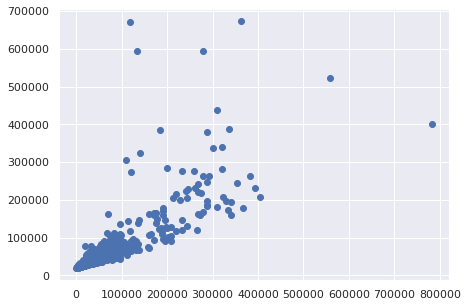

In [ ]:
#one method of checking how good the prediction is
plt.figure(figsize=(7, 5))
plt.scatter(y_test,predictions)
# there are some outliers but for the lower values the model has been accurate

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


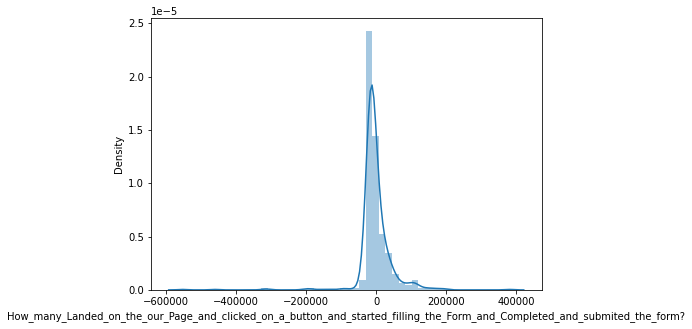

In [ ]:
plt.figure(figsize=(7, 5))
sns.distplot(y_test-predictions)#histogram of residuals, basically the error
#a normally distributed histogram for residuals is a sign that the model has been a correct choice for the data 

In [ ]:
#regression evaluation
from sklearn import metrics
print(metrics.mean_absolute_error(y_test,predictions))
print(metrics.mean_squared_error(y_test,predictions))
print(np.sqrt(metrics.mean_squared_error(y_test,predictions)))#rmse

25294.27601361728
2480591307.1035857
49805.53490430141


In [ ]:
#now that we've trained our model and run evaluations which indicate a good model we can vizualize

In [ ]:
predictions_df = pd.DataFrame(list(zip(y_test, predictions)),
               columns =['actual_y_test','predictions for 2022'])

In [ ]:
predictions_df

,actual_y_test,predictions for 2022
0,118362,118601.988861
1,93416,51256.104304
2,56690,41670.260130
3,36027,36334.941000
4,79764,40364.311518
...,...,...
715,91133,100237.385138
716,10214,30001.854934
717,13161,27258.822190
718,53713,37036.030627


In [ ]:
# Q5 PART 2 (i)

[Text(0.5, 1.0, 'Q5 PART 2 (i)')]

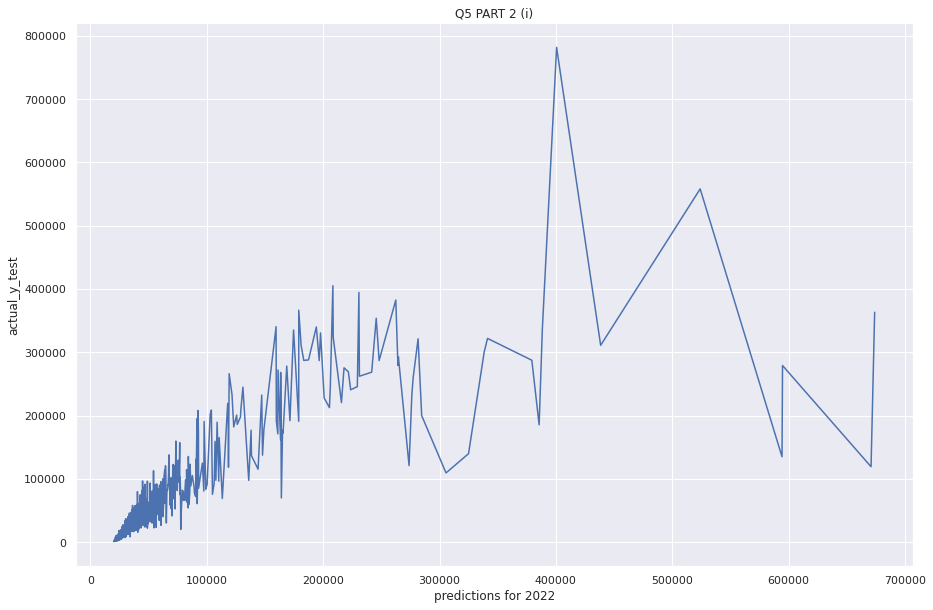

In [ ]:
sns.set_theme()
palette = sns.color_palette("husl", 12)
sns.lineplot(data=predictions_df, x = 'predictions for 2022', y='actual_y_test', palette = palette, err_style='bars').set(title='Q5 PART 2 (i)')

In [ ]:
# as we saw in the scatter plot, the beginning of the model seems promising but not later on

In [ ]:
#------------

In [ ]:
#PREDICTIONS FOR 2021, Question 2

df_2021 = clean_df.loc[(clean_df['Year'] != 2021)]

In [ ]:
X_2021 = df_2021[['How_many_Landed_on_our_Page?', 'How_many_Landed_on_the_our_Page_and_clicked_on_a_button?',
              'How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form?']]#using only the relevant variables for training
y_2021 = df_2021['How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?']

In [ ]:
#test_train_split
from sklearn.model_selection import train_test_split
X_2021_train, X_2021_test, y_2021_train, y_2021_test = train_test_split(X_2021, y_2021, test_size=0.33, random_state=42)
lm_2021 = LinearRegression()
lm_2021.fit(X_2021_train, y_2021_train)

LinearRegression()

In [ ]:
predictions_2021 = lm_2021.predict(X_2021_test)

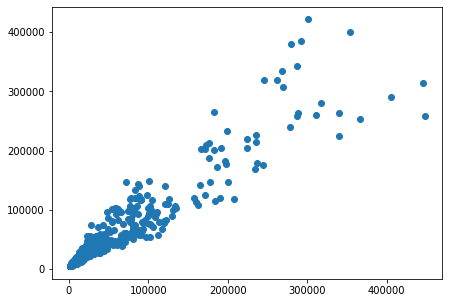

In [ ]:
plt.figure(figsize=(7, 5))
plt.scatter(y_2021_test, predictions_2021)
#we can see that the model has worked okay

In [ ]:
def mape(y_test, pred):#defining a mape function since it doesn't come in-built
    y_test, pred = np.array(y_test), np.array(pred)
    mape = np.mean(np.abs((y_test - pred) / y_test))
    return mape

In [ ]:
mape(y_2021_test, predictions_2021)
# 42% indicates a relatively good score

0.4228156823609447

In [ ]:
predictions_2021_df = pd.DataFrame(list(zip(y_2021_test, predictions_2021)),
               columns =['actual_y_test_2021','predictions for 2021'])

In [ ]:
predictions_2021_df.head()

,actual_y_test_2021,predictions for 2021
0,287941,263889.743842
1,24772,31301.949775
2,99875,89545.857648
3,20261,23763.140281
4,57024,65456.662334


In [ ]:
# Q5 Part 2 (ii)

[Text(0.5, 1.0, 'Q5 PART 2 (ii)')]

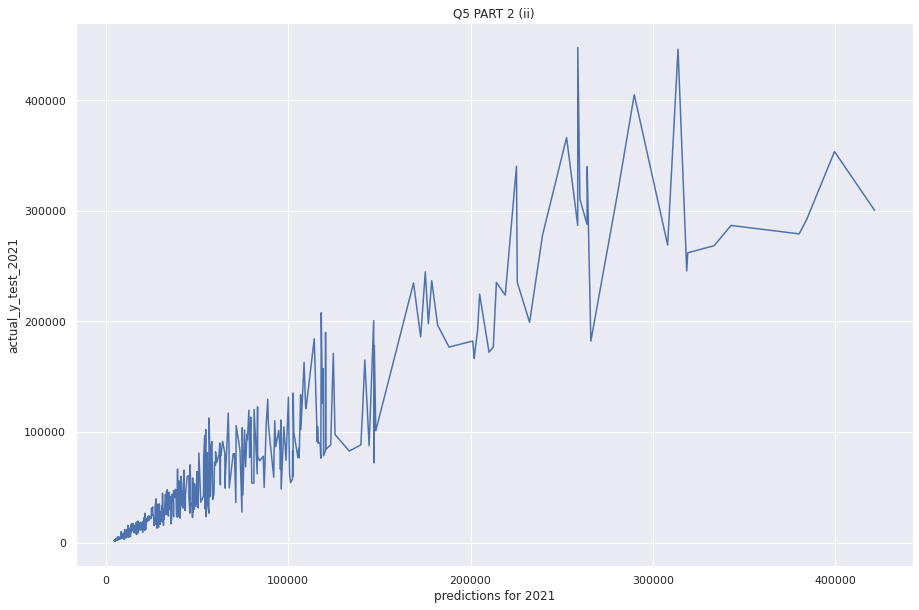

In [ ]:
sns.set_theme()
palette = sns.color_palette("husl", 12)
sns.lineplot(data=predictions_2021_df, x = 'predictions for 2021', y='actual_y_test_2021', palette = palette, err_style='bars').set(title='Q5 PART 2 (ii)')

###### Part 5: Vizualization

In [ ]:
# A line graph for “How_many_Landed_on_the_our_Page_and_clicked_on_a_button?” for the different “Which_Place_in_India?” over the months of the year 2019 & 2020.

In [ ]:
df_viz1 = clean_df.loc[clean_df['Year'] == 2019].copy()
df_viz2 = clean_df.loc[clean_df['Year'] == 2020].copy()

[Text(0.5, 1.0, '2019')]

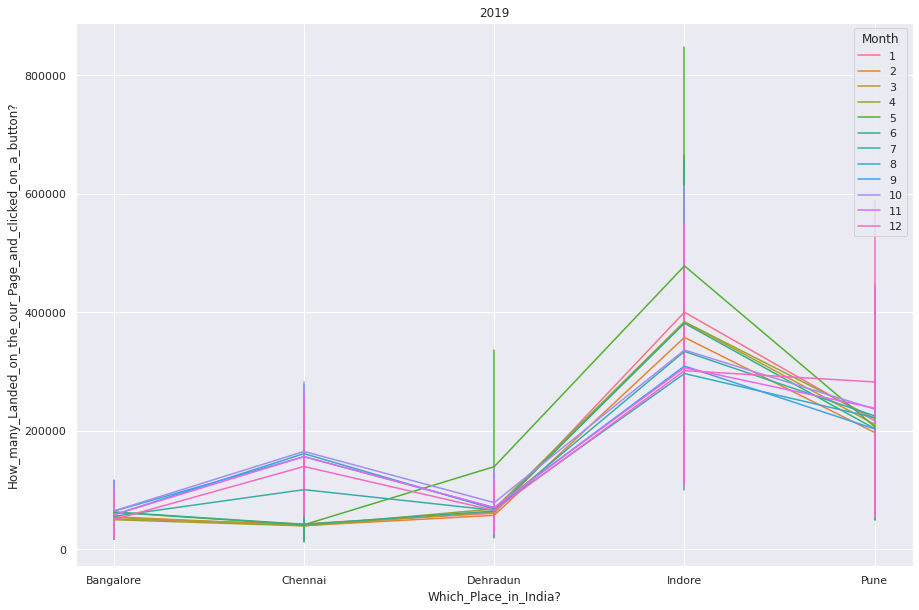

In [ ]:
sns.set_theme()
palette = sns.color_palette("husl", 12)
sns.lineplot(data=df_viz1, x = 'Which_Place_in_India?', y='How_many_Landed_on_the_our_Page_and_clicked_on_a_button?', hue ='Month', palette = palette, err_style='bars').set(title='2019')

[Text(0.5, 1.0, '2020')]

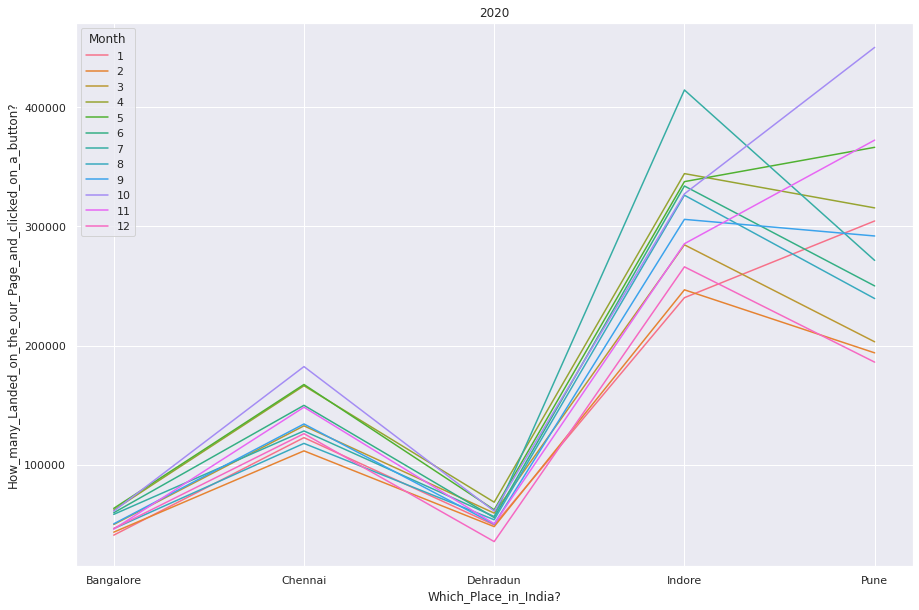

In [ ]:
sns.set_theme()
palette = sns.color_palette("husl", 12)
sns.lineplot(data=df_viz2, x = 'Which_Place_in_India?', y='How_many_Landed_on_the_our_Page_and_clicked_on_a_button?', hue ='Month', palette = palette, err_style=None).set(title='2020')

In [ ]:
# A line graph of the actual and projected number of “How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?” 
# for the months of the year 2021 & 2022

In [ ]:
# answers for above included in the machine learning section